<a href="https://colab.research.google.com/github/vyshnavi2001/NNDL/blob/main/ASSIGNMENT-16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
import math

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Load Data in kW.xlsx to Load Data in kW (1).xlsx


In [4]:
load_data = pd.read_excel('Load Data in kW.xlsx')
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [5]:
type(load_data)

pandas.core.frame.DataFrame

In [6]:
data = load_data.rename(columns={5551.82208:'load'},inplace=False)

In [7]:
data.head()

,load
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [8]:
data.describe()

,load
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   load    2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


In [10]:
data.corr()

,load
load,1.0


In [11]:
data.isnull().sum()

load    0
dtype: int64

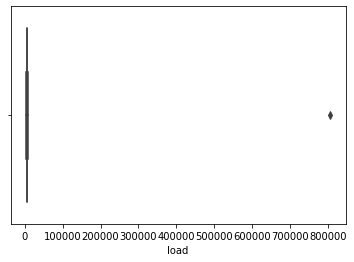

In [12]:
sns.boxplot(x=data['load'])

In [13]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928]),)


In [14]:
data.iloc[928,0] = data.iloc[927,0]

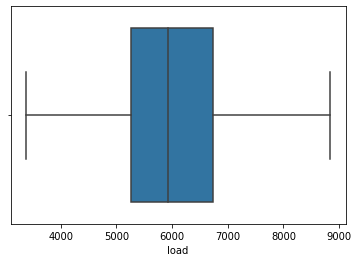

In [15]:
sns.boxplot(x=data['load'])

In [16]:
data_x = []
data_x2 = []
data_y = []
for i in range(24,len(data)):
  data_x.append(data.iloc[i-1,0])
  data_x2.append(data.iloc[i-24,0])
  data_y.append(data.iloc[i,0])


In [17]:
%matplotlib inline

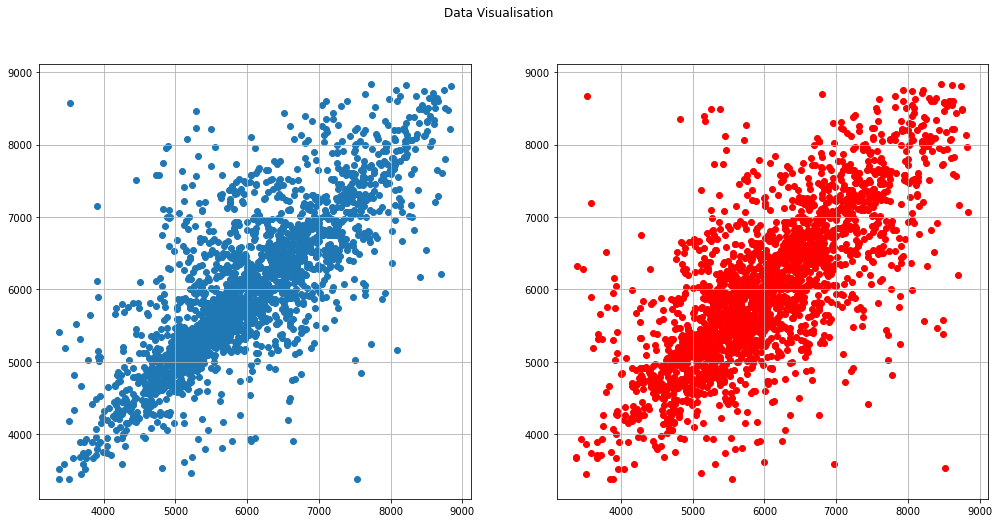

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(17,8))
fig.suptitle("Data Visualisation")
ax1.scatter(data_x,data_y)
ax1.grid()
ax2.scatter(data_x2,data_y,color='red')
ax2.grid()

In [19]:
data_xx1 = pd.DataFrame(data_x)
min_x1 = float(data_xx1.min())
max_x1 = float(data_xx1.max())
data_xx2 = pd.DataFrame(data_x2)
min_x2 = float(data_xx2.min())
max_x2 = float(data_xx2.max())
data_yy = pd.DataFrame(data_y)
min_y = float(data_yy.min())
max_y = float(data_yy.max())
print(min_x1)
print(min_y)
print(max_x1)
print(max_y)
print(max_x2)
print(min_x2)

3377.9196
3377.9196
8841.66948
8841.66948
8841.66948
3377.9196


In [20]:
x1 = minmax_scale(data_x)
x2 = minmax_scale(data_x2)
y = minmax_scale(data_y)
len(data_y)


2159

In [21]:
data_norm = []
for i in range(len(data)-24):
  data_norm.append([x1[i],x2[i],y[i]])

data_norm = pd.DataFrame(data_norm)
data_norm

,0,1,2
0,0.284300,0.293800,0.255799
1,0.255799,0.276454,0.244501
2,0.244501,0.310234,0.239965
3,0.239965,0.332801,0.268466
4,0.268466,0.414254,0.401472
...,...,...,...
2154,0.305212,0.231719,0.228524
2155,0.228524,0.445808,0.217797
2156,0.217797,0.684146,0.246298
2157,0.246298,0.514679,0.324384


In [22]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(data_norm,test_size=0.1)

In [23]:
data_train.head()

,0,1,2
1,0.255799,0.276454,0.244501
1256,0.373456,0.599412,0.700294
222,0.566574,0.648141,0.558786
1856,0.696699,0.756269,0.687284
1740,0.458532,0.161422,0.397278


In [24]:
data_x = np.array(data_train[0])
data_x2 = np.array(data_train[1])
data_y = np.array(data_train[2])
data_x

array([0.25579869, 0.37345582, 0.56657442, ..., 0.45539357, 0.47114205,
       0.50012838])

In [25]:
len(data_x)

1943

In [26]:
len(data_test)

216

In [27]:
# initalising required variables
max_iters=2000
m=1.0
m2=1.0
c=-1.0
Em=0.0
Em2=0.0
Ec=0.0
alpha=0.1
exp=10**(-8)
dm=0.0
dm2=0.0
dc=0.0
iter=1
error=[]
moment = 0.9

In [28]:
while (iter<=max_iters):
  err=0.0
  for i in range(len(data_train)):
    gm=-1*(data_y[i]-(m*data_x[i])-c)*data_x[i]
    gm2=-1*(data_y[i]-(m2*data_x2[i])-c)*data_x2[i]
    gc=-1*(data_y[i]-(m*data_x[i])-c)
    err+=(data_y[i]-m*data_x[i]-m2*data_x2[i]-c)**2
    Em = moment*Em + (1-moment)*(gm**2)
    Em2 = moment*Em2 + (1-moment)*(gm2**2)
    Ec = moment*Ec + (1-moment)*(gc**2)
    r1 = math.sqrt(Em + exp)
    r12 = math.sqrt(Em2 + exp)
    r2 = math.sqrt(Ec + exp)
    dm = -1*(alpha/r1)*gm
    dm2 = -1*(alpha/r12)*gm2
    dc = -1*(alpha/r2)*gc
    m = m + dm
    m2 = m2 + dm2
    c = c + dc
  error.append(err/8)
  iter=iter+1


In [29]:
len(error)

2000

In [30]:
iters = np.arange(max_iters)

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
pred = []
for i in range(len(data_train)):
  pred.append(m*data_x[i] + m2*data_x2[i] + c)

In [33]:
mse_train = mean_squared_error(data_y,pred)

In [34]:
mse_train

0.4023031451017545

In [35]:
data_test

,0,1,2
324,0.628770,0.589997,0.616330
1120,0.276454,0.246298,0.166329
76,0.455308,0.568029,0.477019
938,0.358221,0.600126,0.501270
1729,0.346752,0.250892,0.311603
...,...,...,...
110,0.452655,0.438618,0.487301
737,0.845397,0.771733,0.777695
2042,0.197712,0.241306,0.144960
219,0.495050,0.611167,0.656757


In [36]:
pred_test = []
pred_test =  m*data_test[0] + m2*data_test[1] + c
mse_test = mean_squared_error(data_test[2],pred_test)

In [37]:
mse_test




0.4047993196471723

In [38]:
print("training data mean squared error:",mse_train)
print("Testing data mean squared error:",mse_test)

training data mean squared error: 0.4023031451017545
Testing data mean squared error: 0.4047993196471723


In [39]:
print("model parameter:",m,m2,c)

model parameter: 0.8484320539617525 0.6192857474348322 0.3900422885623917


In [41]:
input_load = float(input("enter load at one day before : "))
input_load2 = float(input("enter load at one hour before : "))
input_load = (input_load - min_x1)/(max_x1-min_x1)
input_load2 = (input_load2 - min_x2)/(max_x2-min_x2)
output_load = (input_load*m) + (input_load2*m2) +c

output_load = output_load*(max_y-min_y)+min_y

print("predicted load for this hour  : ",output_load)

enter load at one day before : 3457.98
enter load at one hour before : 7344.4
predicted load for this hour  :  8033.3236961403045
